In [144]:
import itertools
import string
import random
import pandas as pd
import numpy as np
import multiprocessing
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from wordcloud import WordCloud
import nltk
import pickle
import matplotlib.pyplot as plt

### Carregando a primeira base de dados

In [7]:
df_1 = pd.read_csv('dados/news.csv')
df_1.shape

(6335, 4)

In [8]:
df_1.loc[(df_1['label'] == 1) , ['label']] = "FAKE"
df_1.loc[(df_1['label'] == 0) , ['label']] = "REAL"

In [9]:
df_1.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df_1.duplicated().value_counts()

False    6335
dtype: int64

In [11]:
df_1.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

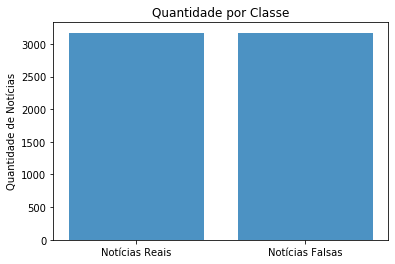

In [12]:
classes = ('Notícias Reais', 'Notícias Falsas')
y_pos = np.arange(len(classes))
performance = [df_1.label.value_counts().REAL, df_1.label.value_counts().FAKE]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos,classes)
plt.ylabel('Quantidade de Notícias')
plt.title('Quantidade por Classe')
plt.show()

In [13]:
df_1.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Carregando a segunda base de dados

In [14]:
df_fake = pd.read_csv('dados/novos/Fake.csv')
df_fake['label']="FAKE"
df_fake.shape

(23481, 5)

In [15]:
df_fake.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [16]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [17]:
df_real = pd.read_csv('dados/novos/True.csv')
df_real['label']="REAL"
df_real.shape

(21417, 5)

In [18]:
df_real.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [19]:
df_real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [20]:
df_final = pd.concat([df_fake,df_real])

In [21]:
df_final.shape

(44898, 5)

In [22]:
df_final = shuffle(df_final)

### Unificando os dataframes

In [23]:
df = df_1.append([df_final])
df = shuffle(df)

In [24]:
df.shape

(51233, 6)

In [25]:
df.head()

,Unnamed: 0,title,text,label,subject,date
11126,NaN,State Department seeks extension for Clinton e...,NEW YORK (Reuters) - The U.S. State Department...,REAL,politicsNews,"January 22, 2016"
4375,NaN,EU says understands aim of U.S. strikes in Syria,BRUSSELS (Reuters) - The European Union on Fri...,REAL,politicsNews,"April 7, 2017"
20692,NaN,MUSLIM IMMIGRANT Chanted “Allahu Akbar” While ...,Was this Somali immigrant refusing to appear i...,FAKE,left-news,"Apr 23, 2016"
15556,NaN,BREAKING: Republican Majority House Caves To O...,Just when you thought the 2014 election result...,FAKE,politics,"Jun 18, 2015"
7388,NaN,Unions brace for pro-business shift in labor p...,NEW YORK (Reuters) - Unions in the United Stat...,REAL,politicsNews,"November 9, 2016"


In [26]:
df.loc[(df['label'] == 1) , ['label']] = "FAKE"
df.loc[(df['label'] == 0) , ['label']] = "REAL"

In [27]:
df.head()

,Unnamed: 0,title,text,label,subject,date
11126,NaN,State Department seeks extension for Clinton e...,NEW YORK (Reuters) - The U.S. State Department...,REAL,politicsNews,"January 22, 2016"
4375,NaN,EU says understands aim of U.S. strikes in Syria,BRUSSELS (Reuters) - The European Union on Fri...,REAL,politicsNews,"April 7, 2017"
20692,NaN,MUSLIM IMMIGRANT Chanted “Allahu Akbar” While ...,Was this Somali immigrant refusing to appear i...,FAKE,left-news,"Apr 23, 2016"
15556,NaN,BREAKING: Republican Majority House Caves To O...,Just when you thought the 2014 election result...,FAKE,politics,"Jun 18, 2015"
7388,NaN,Unions brace for pro-business shift in labor p...,NEW YORK (Reuters) - Unions in the United Stat...,REAL,politicsNews,"November 9, 2016"


In [28]:
df.isnull().sum()

Unnamed: 0    44898
title             0
text              0
label             0
subject        6335
date           6335
dtype: int64

In [29]:
df.duplicated().value_counts()

False    51024
True       209
dtype: int64

In [30]:
df.label.value_counts()

FAKE    26645
REAL    24588
Name: label, dtype: int64

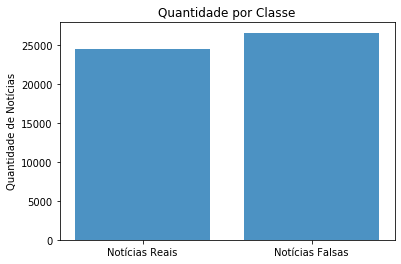

In [31]:
classes = ('Notícias Reais', 'Notícias Falsas')
y_pos = np.arange(len(classes))
performance = [df.label.value_counts().REAL, df.label.value_counts().FAKE]

plt.bar(y_pos, performance, align='center', alpha=0.8)
plt.xticks(y_pos,classes)
plt.ylabel('Quantidade de Notícias')
plt.title('Quantidade por Classe')
plt.show()

In [32]:
x = df['text']
y = df['label']

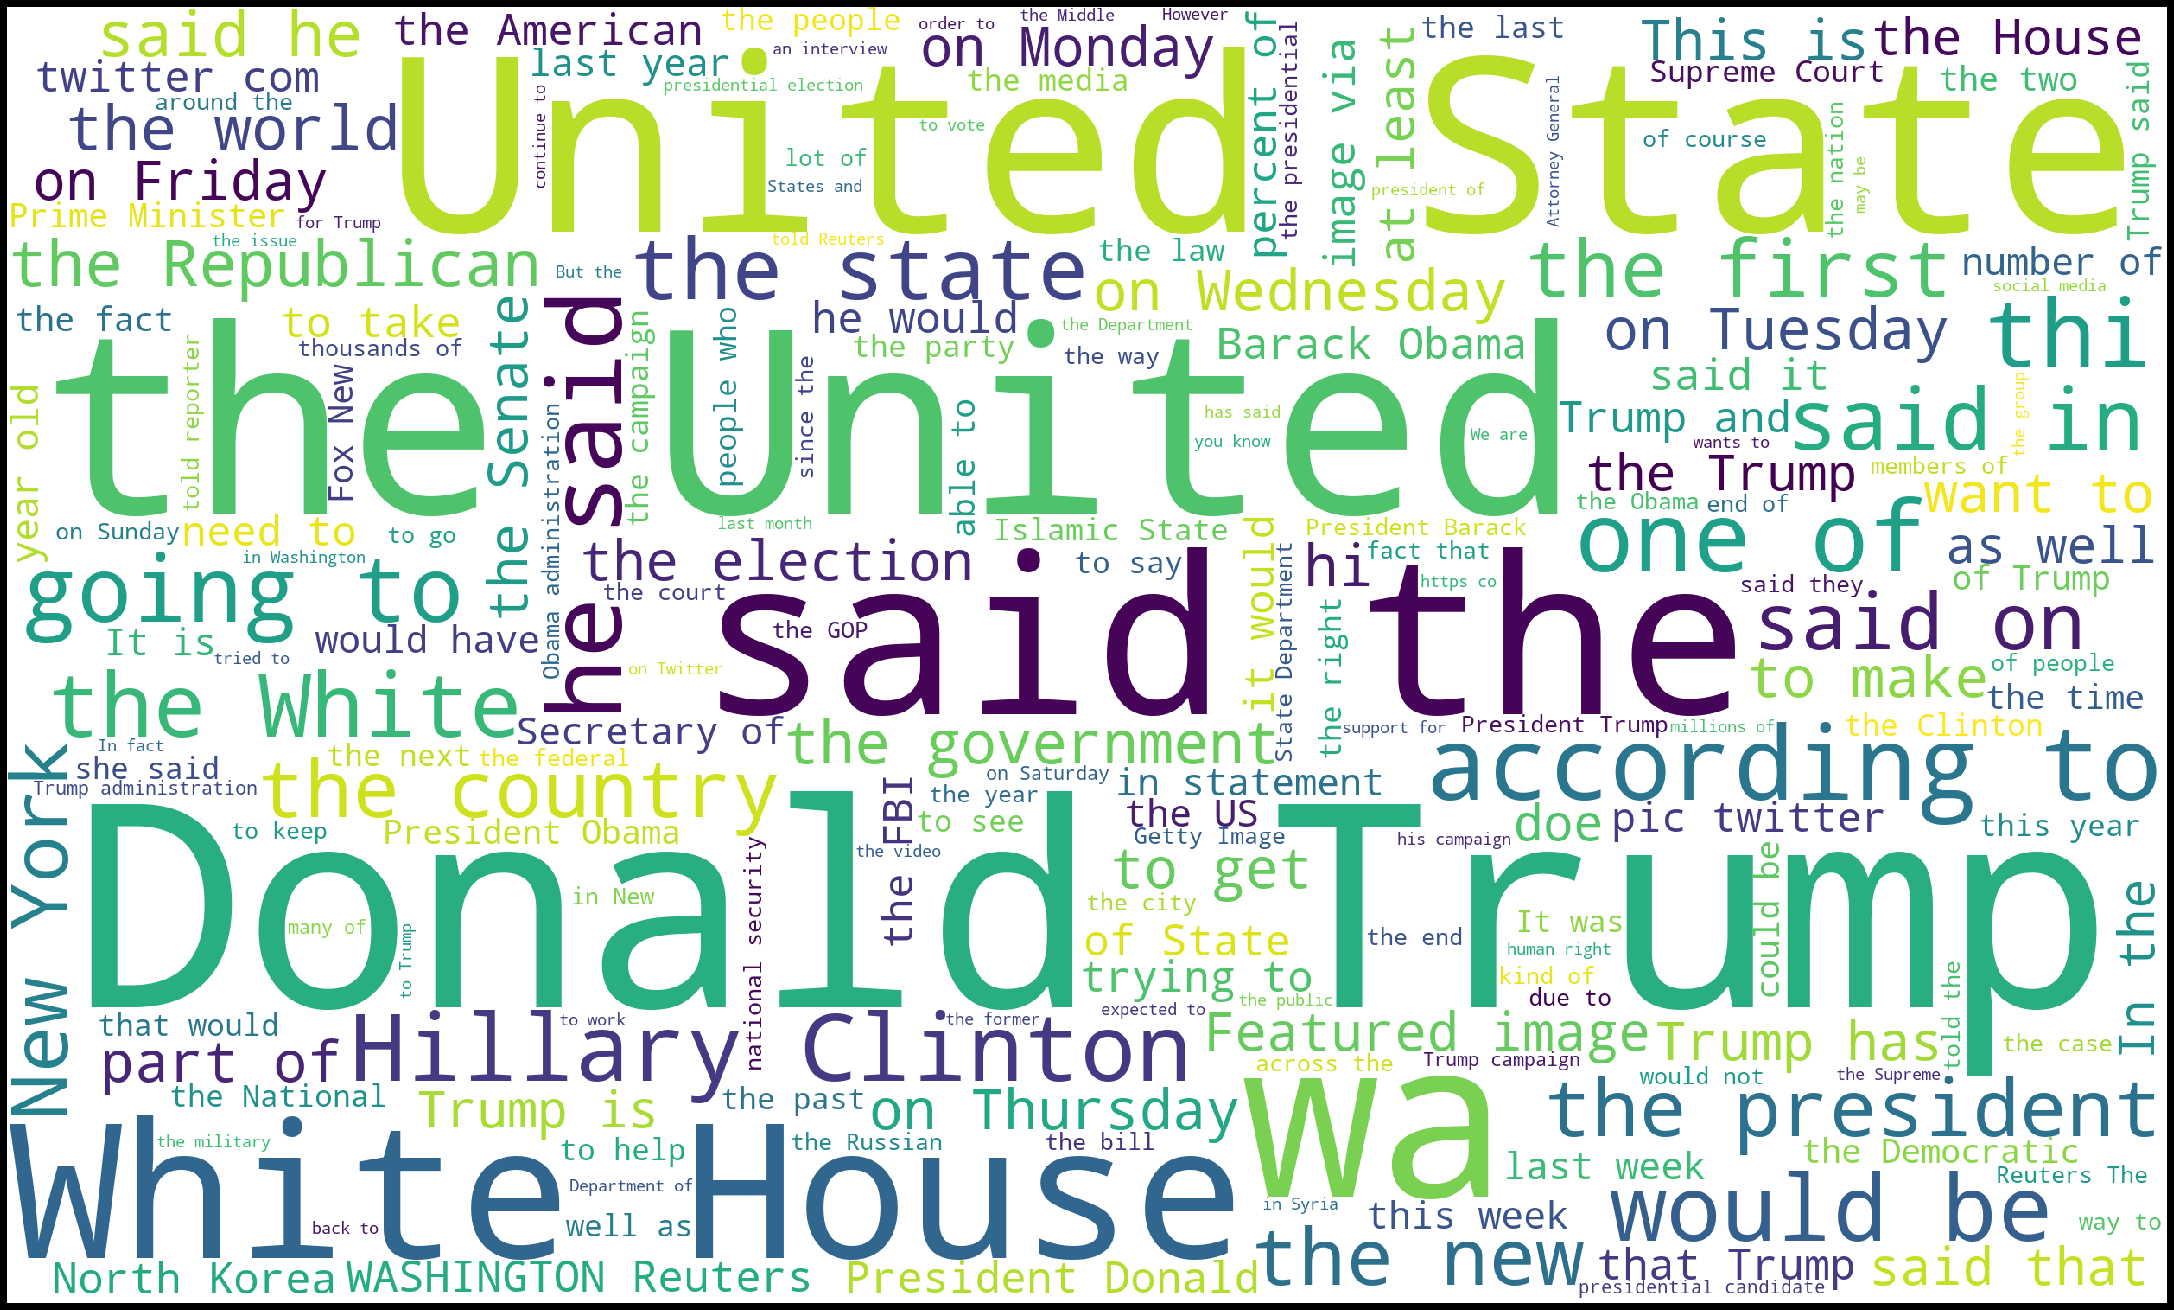

In [147]:
txt = df.text.str.cat(sep=' ')
wordcloud = WordCloud(width=2500, height=1500, background_color='white', 
                     stopwords = set(nltk.corpus.stopwords.words("english"))).generate(txt)
fig = plt.figure(figsize=(30,40), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del txt

In [33]:
#Segmentação da base de dados para treino e teste 
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

# Tokenização com TfidfVectorizer

## Utilizando o algoritmo nBayes

In [34]:
p_tf_nb = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [35]:
#Training our data
p_tf_nb.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [36]:
#Predicting the label for the test data
pred_tf_nb = p_tf_nb.predict(x_test)

In [37]:
#Checking the performance of our model
print(classification_report(y_test, pred_tf_nb))
print(confusion_matrix(y_test, pred_tf_nb))

              precision    recall  f1-score   support

        FAKE       0.91      0.91      0.91      5348
        REAL       0.90      0.90      0.90      4899

    accuracy                           0.91     10247
   macro avg       0.91      0.91      0.91     10247
weighted avg       0.91      0.91      0.91     10247

[[4878  470]
 [ 493 4406]]


[[4878  470]
 [ 493 4406]]


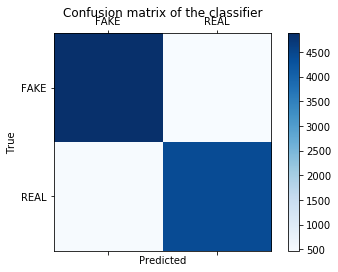

In [61]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_tf_nb, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [129]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_tf_nb)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 90.6%


In [53]:
noticia_teste = "Teachers unions sue Florida’s governor over an order requiring schools to reopen despite surging cases. India recorded at least 40,000 new infections on Monday, its highest single-day total."

In [54]:
teste = p_tf_nb.predict([noticia_teste])
teste

array(['REAL'], dtype='<U4')

In [62]:
print(accuracy_score(pred_tf_nb, y_test))

0.9060212745193715


## Utilizando o algoritmo PassiveAggressiveClassifier 

In [63]:
p_tf_pac = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('pacmodel', PassiveAggressiveClassifier())])

In [64]:
#Treinando o modelo
p_tf_pac.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pacmodel',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
        

In [65]:
#Realizando a verificação com os dados de teste
pred_tf_pac = p_tf_pac.predict(x_test)

In [66]:
#Checando a performance do modelo
print(classification_report(y_test, pred_tf_pac))
print(confusion_matrix(y_test, pred_tf_pac))

              precision    recall  f1-score   support

        FAKE       0.97      0.98      0.98      5348
        REAL       0.98      0.97      0.97      4899

    accuracy                           0.97     10247
   macro avg       0.97      0.97      0.97     10247
weighted avg       0.97      0.97      0.97     10247

[[5228  120]
 [ 145 4754]]


[[5228  120]
 [ 145 4754]]


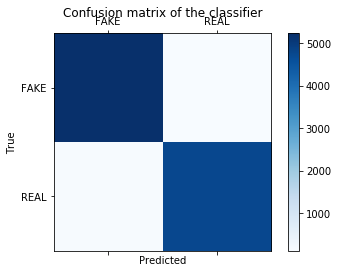

In [67]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_tf_pac, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [130]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_tf_pac)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 97.41%


In [69]:
teste = p_tf_pac.predict([noticia_teste])
teste

array(['FAKE'], dtype='<U4')

## Utilizando o algoritmo DecisionTreeClassifier

In [70]:
p_tf_dt = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('dtmodel', DecisionTreeClassifier())])

In [71]:
#Treinando o modelo
p_tf_dt.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('dtmodel',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
           

In [72]:
#Realizando a verificação com os dados de teste
pred_tf_dt = p_tf_dt.predict(x_test)

In [73]:
#Checando a performance do modelo
print(classification_report(y_test, pred_tf_dt))
print(confusion_matrix(y_test, pred_tf_dt))

              precision    recall  f1-score   support

        FAKE       0.95      0.96      0.95      5348
        REAL       0.95      0.95      0.95      4899

    accuracy                           0.95     10247
   macro avg       0.95      0.95      0.95     10247
weighted avg       0.95      0.95      0.95     10247

[[5108  240]
 [ 260 4639]]


[[5108  240]
 [ 260 4639]]


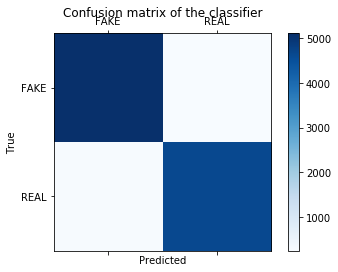

In [74]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_tf_dt, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [131]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_tf_dt)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 95.12%


In [75]:
teste = p_tf_dt.predict([noticia_teste])
teste

array(['FAKE'], dtype=object)

## Utilizando o algoritmo SGDClassifier

In [76]:
p_tf_sgd = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('sgdmodel', SGDClassifier())])

In [77]:
#Treinando o modelo
p_tf_sgd.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [78]:
#Realizando a verificação com os dados de teste
pred_tf_sgd = p_tf_sgd.predict(x_test)

In [79]:
#Checando a performance do modelo
print(classification_report(y_test, pred_tf_sgd))
print(confusion_matrix(y_test, pred_tf_sgd))

              precision    recall  f1-score   support

        FAKE       0.96      0.97      0.97      5348
        REAL       0.97      0.95      0.96      4899

    accuracy                           0.96     10247
   macro avg       0.96      0.96      0.96     10247
weighted avg       0.96      0.96      0.96     10247

[[5211  137]
 [ 236 4663]]


[[5211  137]
 [ 236 4663]]


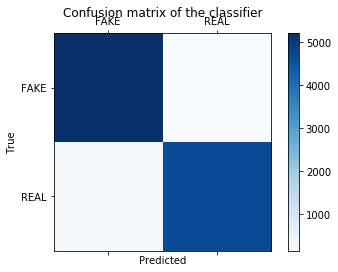

In [80]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_tf_sgd, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [132]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_tf_sgd)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 96.36%


In [81]:
teste = p_tf_sgd.predict([noticia_teste])
teste

array(['FAKE'], dtype='<U4')

## Utilizando o algoritmo LinearSVC

In [82]:
p_tf_svc = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('svcmodel', LinearSVC())])

In [83]:
#Treinando o modelo
p_tf_svc.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svcmodel',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
     

In [84]:
#Realizando a verificação com os dados de teste
pred_tf_svc = p_tf_svc.predict(x_test)

In [85]:
#Checando a performance do modelo
print(classification_report(y_test, pred_tf_svc))
print(confusion_matrix(y_test, pred_tf_svc))

              precision    recall  f1-score   support

        FAKE       0.97      0.98      0.98      5348
        REAL       0.98      0.97      0.98      4899

    accuracy                           0.98     10247
   macro avg       0.98      0.98      0.98     10247
weighted avg       0.98      0.98      0.98     10247

[[5267   81]
 [ 157 4742]]


[[5267   81]
 [ 157 4742]]


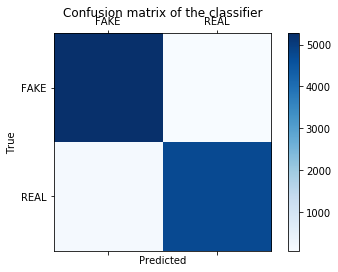

In [86]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_tf_svc, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [133]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_tf_svc)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 97.68%


In [87]:
teste = p_tf_svc.predict([noticia_teste])
teste

array(['FAKE'], dtype=object)

# Tokenização com CountVectorizer

## Utilizando o algoritmo NBayes

In [88]:
p_cv_nb = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [89]:
#Treinando o modelo
p_cv_nb.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('countvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [90]:
#Realizando a verificação com os dados de teste
pred_cv_nb = p_cv_nb.predict(x_test)

In [91]:
#Checando a performance do modelo
print(classification_report(y_test, pred_cv_nb))
print(confusion_matrix(y_test, pred_cv_nb))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92      5348
        REAL       0.91      0.92      0.92      4899

    accuracy                           0.92     10247
   macro avg       0.92      0.92      0.92     10247
weighted avg       0.92      0.92      0.92     10247

[[4914  434]
 [ 369 4530]]


[[4914  434]
 [ 369 4530]]


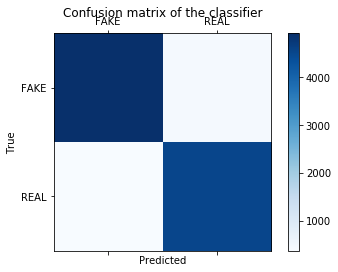

In [92]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_cv_nb, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [134]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_cv_nb)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 92.16%


In [93]:
teste = p_cv_nb.predict([noticia_teste])
teste

array(['REAL'], dtype='<U4')

In [94]:
##Passive Aggressive

In [95]:
p_cv_pac = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                    ('pacmodel', PassiveAggressiveClassifier())])

In [96]:
#Treinando o modelo
p_cv_pac.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('countvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('pacmodel',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
                                             fit_intercept=True, loss='hinge',
                    

In [97]:
#Realizando a verificação com os dados de teste
pred_cv_pac = p_cv_pac.predict(x_test)

In [98]:
#Checando a performance do modelo
print(classification_report(y_test, pred_cv_pac))
print(confusion_matrix(y_test, pred_cv_pac))

              precision    recall  f1-score   support

        FAKE       0.96      0.97      0.97      5348
        REAL       0.97      0.96      0.96      4899

    accuracy                           0.97     10247
   macro avg       0.97      0.96      0.97     10247
weighted avg       0.97      0.97      0.97     10247

[[5199  149]
 [ 208 4691]]


[[5199  149]
 [ 208 4691]]


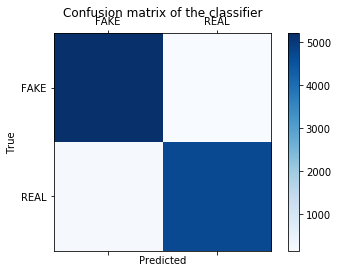

In [99]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_cv_pac, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [135]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_cv_pac)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 96.52%


In [100]:
teste = p_cv_pac.predict([noticia_teste])
teste

array(['FAKE'], dtype='<U4')

In [101]:
##Decicion Tree

In [102]:
p_cv_dt = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                    ('dtmodel', DecisionTreeClassifier())])

In [103]:
#Treinando o modelo
p_cv_dt.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('countvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('dtmodel',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
   

In [104]:
#Realizando a verificação com os dados de teste
pred_cv_dt = p_cv_dt.predict(x_test)

In [105]:
#Checando a performance do modelo
print(classification_report(y_test, pred_cv_dt))
print(confusion_matrix(y_test, pred_cv_dt))

              precision    recall  f1-score   support

        FAKE       0.95      0.97      0.96      5348
        REAL       0.97      0.95      0.96      4899

    accuracy                           0.96     10247
   macro avg       0.96      0.96      0.96     10247
weighted avg       0.96      0.96      0.96     10247

[[5182  166]
 [ 248 4651]]


[[5182  166]
 [ 248 4651]]


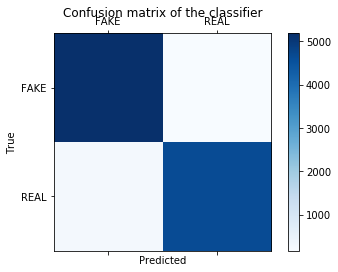

In [106]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_cv_dt, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [136]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_cv_dt)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 95.96%


In [107]:
teste = p_cv_dt.predict([noticia_teste])
teste

array(['FAKE'], dtype=object)

In [108]:
##SGD

In [109]:
p_cv_sgd = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                    ('dtmodel', SGDClassifier())])

In [110]:
#Treinando o modelo
p_cv_sgd.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('countvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocab...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000,

In [111]:
#Realizando a verificação com os dados de teste
pred_cv_sgd = p_cv_sgd.predict(x_test)

In [112]:
#Checando a performance do modelo
print(classification_report(y_test, pred_cv_sgd))
print(confusion_matrix(y_test, pred_cv_sgd))

              precision    recall  f1-score   support

        FAKE       0.96      0.97      0.97      5348
        REAL       0.97      0.96      0.97      4899

    accuracy                           0.97     10247
   macro avg       0.97      0.97      0.97     10247
weighted avg       0.97      0.97      0.97     10247

[[5212  136]
 [ 195 4704]]


[[5212  136]
 [ 195 4704]]


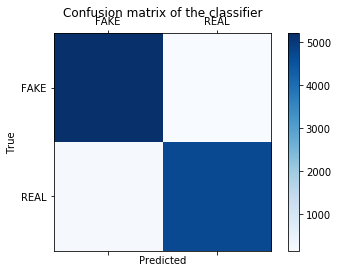

In [113]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_cv_sgd, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [137]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_cv_sgd)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 96.77%


In [114]:
teste = p_cv_sgd.predict([noticia_teste])
teste

array(['FAKE'], dtype='<U4')

In [115]:
##SVC

In [116]:
p_cv_svc = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                    ('svcmodel', MultinomialNB())])

In [117]:
#Treinando o modelo
p_cv_svc.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('countvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svcmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [118]:
#Realizando a verificação com os dados de teste
pred_cv_svc = p_cv_svc.predict(x_test)

In [119]:
#Checando a performance do modelo
print(classification_report(y_test, pred_cv_svc))
print(confusion_matrix(y_test, pred_cv_svc))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92      5348
        REAL       0.91      0.92      0.92      4899

    accuracy                           0.92     10247
   macro avg       0.92      0.92      0.92     10247
weighted avg       0.92      0.92      0.92     10247

[[4914  434]
 [ 369 4530]]


accuracy:   0.922
[[4914  434]
 [ 369 4530]]


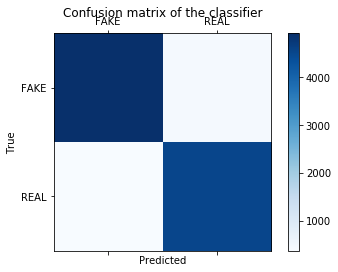

In [125]:
labels = ['FAKE', 'REAL']
score = accuracy_score(y_test, pred_cv_svc)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred_cv_svc, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [140]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_cv_svc)
print(f'Acurácia: {round(score*100,2)}%')

Acurácia: 92.16%


In [127]:
cm2 = confusion_matrix(y_test, pred_cv_svc, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm2, classes=['FAKE', 'REAL'])

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'classes'

In [121]:
teste = p_cv_svc.predict([noticia_teste])
teste

array(['REAL'], dtype='<U4')

In [148]:
##testes

In [ ]:
p_cv_svc = Pipeline([('countvec', CountVectorizer(stop_words='english')),
                    ('svcmodel', MultinomialNB())])

In [ ]:
#Treinando o modelo
p_cv_svc.fit(x_train, y_train)

In [ ]:
#Realizando a verificação com os dados de teste
pred_cv_svc = p_cv_svc.predict(x_test)

In [ ]:
#Checando a performance do modelo
print(classification_report(y_test, pred_cv_svc))
print(confusion_matrix(y_test, pred_cv_svc))

In [ ]:
labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test, pred_cv_sgd, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#Calculando a acurácia do modelo
score = accuracy_score(y_test,pred_cv_svc)
print(f'Acurácia: {round(score*100,2)}%')

In [ ]:
teste = p_cv_sgd.predict([noticia_teste])
teste

In [122]:
##Comparações e Conclusões